In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# Messy hacked up code

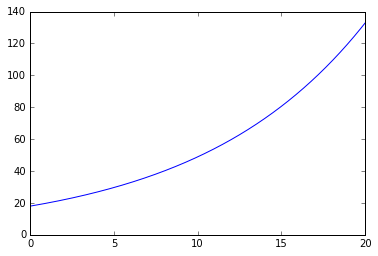

In [9]:
p = 18
r = 0.1

sim_length = 20
dt = 0.01

xs = []
ys = []

num_iter = int(sim_length / dt) + 1
for i in range(num_iter):
    xs.append(i * dt)
    ys.append(p)
    p += r * p * dt
    
plt.plot(xs, ys)

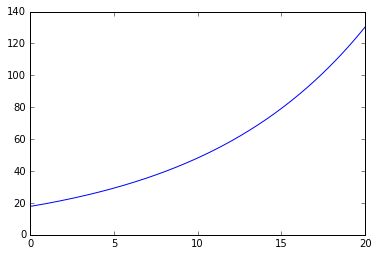

In [17]:
p = 18
r = 0.1

sim_length = 20

xs = np.linspace(0, sim_length, sim_length * 10)
ys = [p]

for i in range(1, len(xs)):
    dt = xs[i] - xs[i - 1]
    ys.append(p)
    p += r * p * dt
    
plt.plot(xs, ys)

In [12]:
len(xs)

200

In [13]:
len(ys)

199

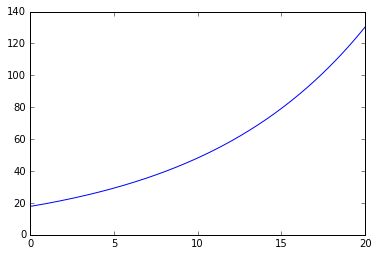

In [18]:
p = 18
r = 0.1

sim_length = 20

def growth(u, dt):
    return u * r * dt

xs = np.linspace(0, sim_length, sim_length * 10)
ys = [p]

for i in range(1, len(xs)):
    dt = xs[i] - xs[i - 1]
    ys.append(p)
    p += growth(p, dt)
    
plt.plot(xs, ys)

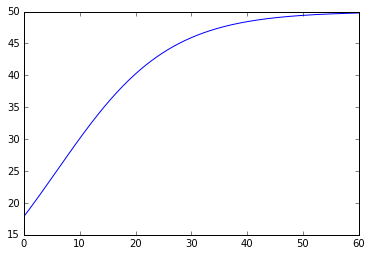

In [24]:
p = 18
r = 0.1
M = 50

sim_length = 60

def logistic(u, dt):
    return u * r * (1 - u / M) * dt

xs = np.linspace(0, sim_length, sim_length * 10)
ys = [p]

for i in range(1, len(xs)):
    dt = xs[i] - xs[i - 1]
    ys.append(p)
    p += logistic(p, dt)
    
plt.plot(xs, ys)

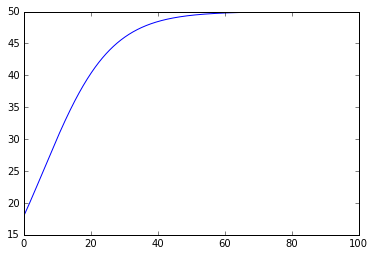

In [28]:
p = 18
r = 0.1
M = 50

sim_length = 100

def euler(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        dt = deltas[i] - deltas[i - 1]
        initial += func(initial, dt)
        vals.append(initial)
    return vals
    

def logistic(u, dt):
    return u * r * (1 - u / M) * dt

xs = np.linspace(0, sim_length, sim_length * 10)
ys = euler(logistic, p, xs)

plt.plot(xs, ys)

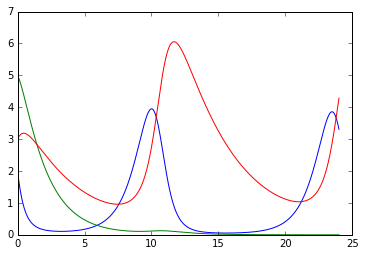

In [55]:
x = 2.0
y = 5.0
z = 3.0
a = 1.23
b = 0.35
d = 0.18
g = 0.53
n = 0.25
m = 0.28
w = 0.43

sim_length = 24

def euler(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        cur = np.array(vals[-1][:])
        dt = deltas[i] - deltas[i - 1]
        cur += func(cur, dt)
        vals.append(cur)
    return np.array(vals)
    

def predprey(u, dt):
    x, y, z = u
    dx = (a * x - b * x * y - w * z * x) * dt
    dy = (-g * y  + d * x * y) * dt
    dz = (-n * z + m * z * x) * dt
    return [dx, dy, dz]

xs = np.linspace(0, sim_length, sim_length * 3000)
ys = euler(predprey, [x, y, z], xs)

plt.plot(xs, ys)

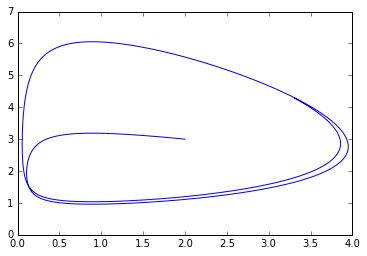

In [57]:
plt.plot(ys[:, 0], ys[:, 2])

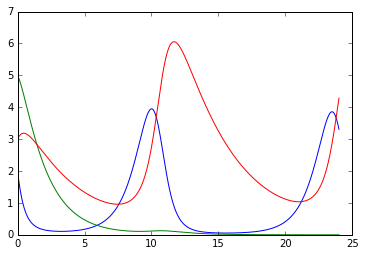

In [59]:
x = 2.0
y = 5.0
z = 3.0
a = 1.23
b = 0.35
d = 0.18
g = 0.53
n = 0.25
m = 0.28
w = 0.43

sim_length = 24

def euler(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        cur = np.array(vals[-1][:])
        dt = deltas[i] - deltas[i - 1]
        cur += func(cur, deltas[i]) * dt
        vals.append(cur)
    return np.array(vals)
    

def predprey(u, t):
    x, y, z = u
    dx = (a * x - b * x * y - w * z * x)
    dy = (-g * y  + d * x * y) 
    dz = (-n * z + m * z * x)
    return np.array([dx, dy, dz])

xs = np.linspace(0, sim_length, sim_length * 3000)
ys = euler(predprey, [x, y, z], xs)

plt.plot(xs, ys)